<a href="https://colab.research.google.com/github/maik1105/Sentiment-Analysis---PANDAS/blob/main/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Downloading the file firectly from Kaggle

In [ ]:
!pip install -q kaggle #Install Kaggle API

import os
import json #Set up kaggle credentials

kaggle_token = {
    "username": "miguelangelgonzalez1",
    "key": "49612a0c855698fda610ac46bdf92f7b"
}

os.makedirs("/root/.kaggle", exist_ok=True) #Create .kaggle directory and save API key
with open("/root/.kaggle/kaggle.json", "w") as f:
  json.dump(kaggle_token, f)
os.chmod("/root/.kaggle/kaggle.json", 0o600)


!kaggle datasets download -d kashishparmar02/social-media-sentiments-analysis-dataset # Download the datset

!unzip -q social-media-sentiments-analysis-dataset.zip -d social_sentiment_data #unzip the file

import os
print("Downloaded files:", os.listdir("social_sentiment_data"))





Dataset URL: https://www.kaggle.com/datasets/kashishparmar02/social-media-sentiments-analysis-dataset
License(s): CC0-1.0
  0% 0.00/50.9k [00:00<?, ?B/s]
100% 50.9k/50.9k [00:00<00:00, 163MB/s]
Downloaded files: ['sentimentdataset.csv']


In [ ]:
#Manipulating the data

In [ ]:
import pandas as pd
df = pd.read_csv("social_sentiment_data/sentimentdataset.csv")
df.head()

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


In [ ]:
df.describe()

,Unnamed: 0.1,Unnamed: 0,Retweets,Likes,Year,Month,Day,Hour
count,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000
mean,366.464481,369.740437,21.508197,42.901639,2020.471311,6.122951,15.497268,15.521858
std,211.513936,212.428936,7.061286,14.089848,2.802285,3.411763,8.474553,4.113414
min,0.000000,0.000000,5.000000,10.000000,2010.000000,1.000000,1.000000,0.000000
25%,183.750000,185.750000,17.750000,34.750000,2019.000000,3.000000,9.000000,13.000000
50%,366.500000,370.500000,22.000000,43.000000,2021.000000,6.000000,15.000000,16.000000
75%,549.250000,553.250000,25.000000,50.000000,2023.000000,9.000000,22.000000,19.000000
max,732.000000,736.000000,40.000000,80.000000,2023.000000,12.000000,31.000000,23.000000


In [ ]:
df['Timestamp'] = pd.to_datetime(df['Timestamp']) #Convert Timestamp to dateformat
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Unnamed: 0.1  732 non-null    int64         
 1   Unnamed: 0    732 non-null    int64         
 2   Text          732 non-null    object        
 3   Sentiment     732 non-null    object        
 4   Timestamp     732 non-null    datetime64[ns]
 5   User          732 non-null    object        
 6   Platform      732 non-null    object        
 7   Hashtags      732 non-null    object        
 8   Retweets      732 non-null    float64       
 9   Likes         732 non-null    float64       
 10  Country       732 non-null    object        
 11  Year          732 non-null    int64         
 12  Month         732 non-null    int64         
 13  Day           732 non-null    int64         
 14  Hour          732 non-null    int64         
dtypes: datetime64[ns](1), float64(2), int64(

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
727,728,732,Collaborating on a science project that receiv...,Happy,2017-08-18 18:20:00,ScienceProjectSuccessHighSchool,Facebook,#ScienceFairWinner #HighSchoolScience,20.0,39.0,UK,2017,8,18,18
728,729,733,Attending a surprise birthday party organized ...,Happy,2018-06-22 14:15:00,BirthdayPartyJoyHighSchool,Instagram,#SurpriseCelebration #HighSchoolFriendship,25.0,48.0,USA,2018,6,22,14
729,730,734,Successfully fundraising for a school charity ...,Happy,2019-04-05 17:30:00,CharityFundraisingTriumphHighSchool,Twitter,#CommunityGiving #HighSchoolPhilanthropy,22.0,42.0,Canada,2019,4,5,17
730,731,735,"Participating in a multicultural festival, cel...",Happy,2020-02-29 20:45:00,MulticulturalFestivalJoyHighSchool,Facebook,#CulturalCelebration #HighSchoolUnity,21.0,43.0,UK,2020,2,29,20


In [ ]:
df['Sentiment'] = df['Sentiment'].str.lower().str.strip() #Lower case for cleaning sentiment column as it detects different labels for the same sentiment
print("Unique sentiment labels:", df['Sentiment'].nunique()) #Check for unique sentiment values
print("Sentiment types:", df['Sentiment'].unique())

Unique sentiment labels: 191
Sentiment types: ['positive' 'negative' 'neutral' 'anger' 'fear' 'sadness' 'disgust'
 'happiness' 'joy' 'love' 'amusement' 'enjoyment' 'admiration' 'affection'
 'awe' 'disappointed' 'surprise' 'acceptance' 'adoration' 'anticipation'
 'bitter' 'calmness' 'confusion' 'excitement' 'kind' 'pride' 'shame'
 'elation' 'euphoria' 'contentment' 'serenity' 'gratitude' 'hope'
 'empowerment' 'compassion' 'tenderness' 'arousal' 'enthusiasm'
 'fulfillment' 'reverence' 'despair' 'grief' 'loneliness' 'jealousy'
 'resentment' 'frustration' 'boredom' 'anxiety' 'intimidation'
 'helplessness' 'envy' 'regret' 'curiosity' 'indifference' 'numbness'
 'melancholy' 'nostalgia' 'ambivalence' 'determination' 'zest' 'hopeful'
 'proud' 'grateful' 'empathetic' 'compassionate' 'playful' 'free-spirited'
 'inspired' 'confident' 'bitterness' 'yearning' 'fearful' 'apprehensive'
 'overwhelmed' 'jealous' 'devastated' 'frustrated' 'envious' 'dismissive'
 'thrill' 'bittersweet' 'overjoyed' 'inspi

/tmp/ipython-input-8-3800989926.py:13: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


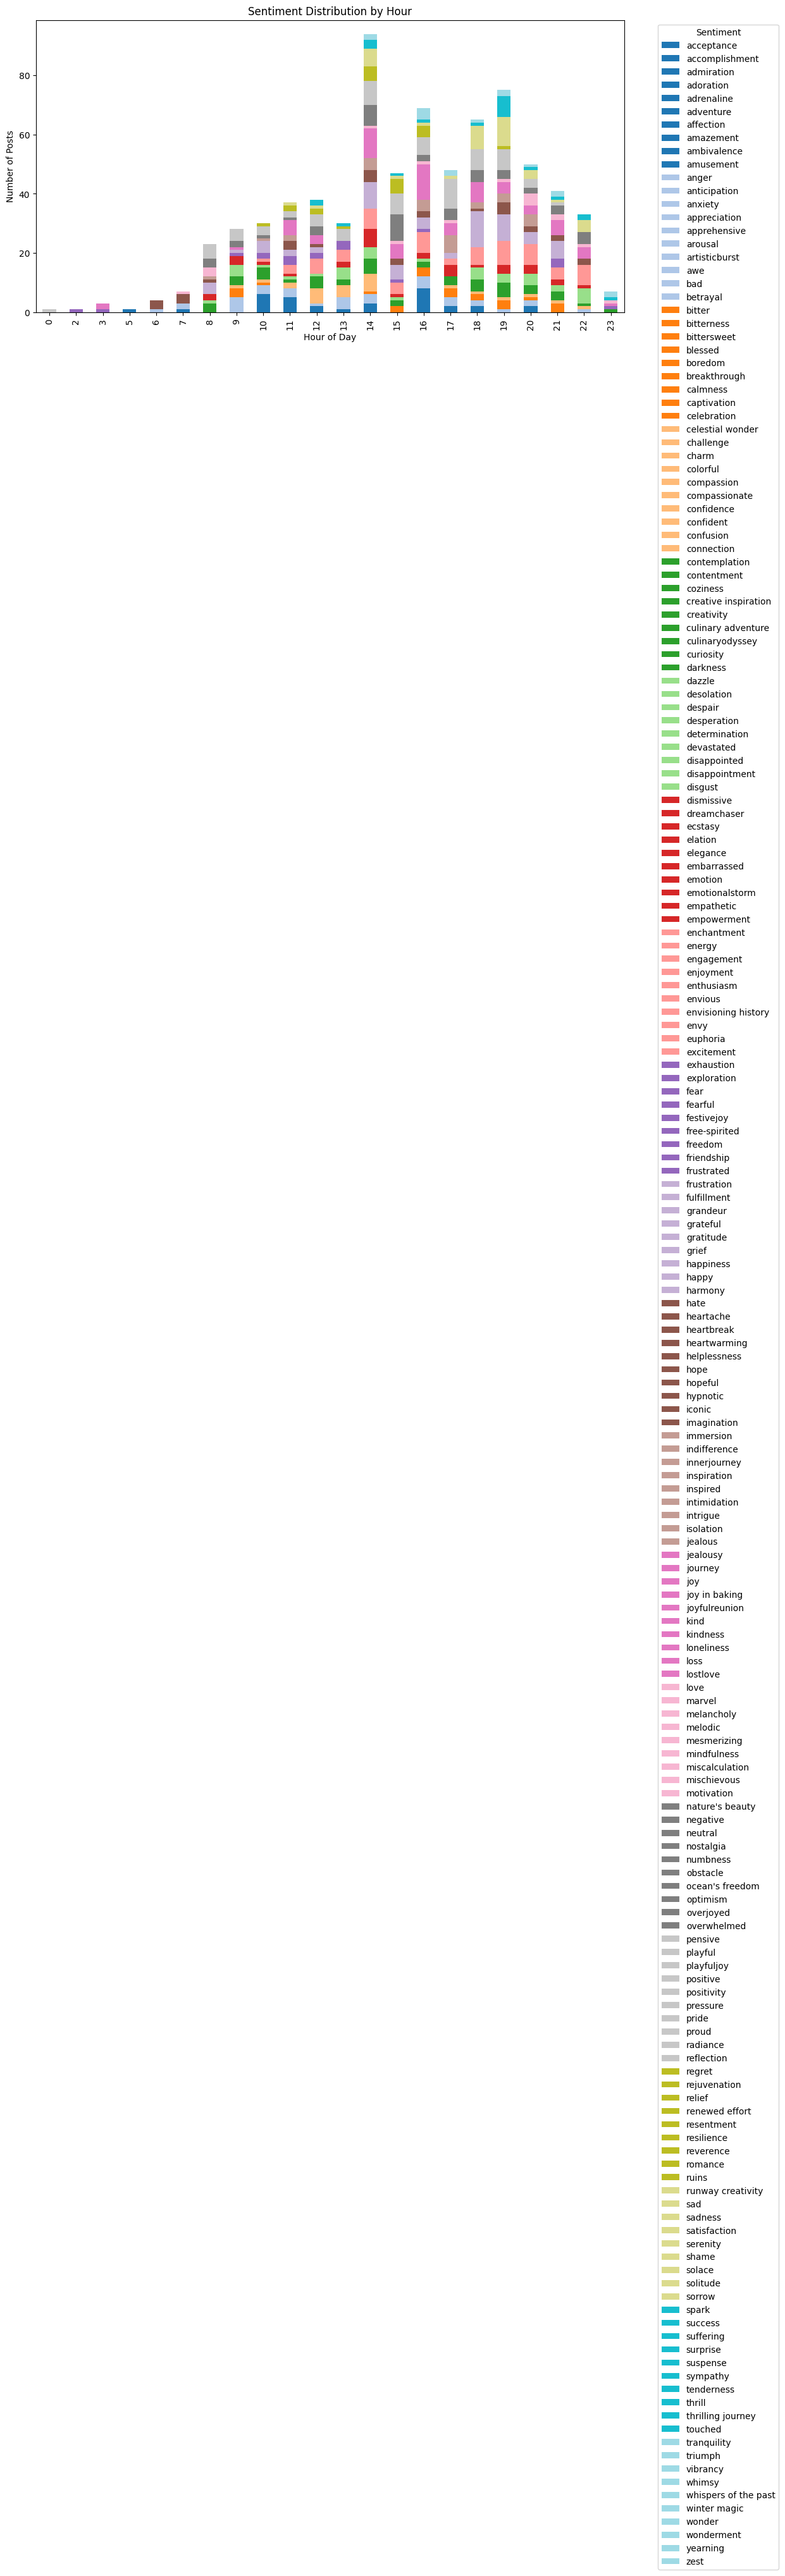

In [ ]:
df.groupby(['Hour', 'Sentiment']).size().unstack().plot(
    kind='bar',
    stacked=True,
    figsize=(12,6),
    colormap='tab20'
)

import matplotlib.pyplot as plt
plt.title("Sentiment Distribution by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Posts")
plt.legend(title="Sentiment", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
#There are 191 labeled sentiments, lets reduce them into lesser categories for plotting convenience
#We will classify each sentiment into a general one
core_sentiment_map = {
    'joy': [
        'joy', 'happiness', 'amusement', 'enjoyment', 'elation', 'overjoyed',
        'contentment', 'serenity', 'gratitude', 'hope', 'pride', 'zest',
        'satisfaction', 'blessed', 'wonder', 'inspired', 'confidence', 'freedom',
        'excitement', 'triumph', 'celebration', 'cheerful', 'playful', 'ecstasy',
        'optimism', 'enthusiasm', 'euphoria', 'positivity'
    ],
    'sadness': [
        'sadness', 'grief', 'sorrow', 'melancholy', 'heartbreak', 'loneliness',
        'despair', 'loss', 'desolation', 'darkness', 'isolation', 'regret',
        'disappointment', 'disappointed', 'ruins', 'heartache', 'solitude'
    ],
    'anger': [
        'anger', 'resentment', 'frustration', 'bitterness', 'jealousy', 'hate',
        'betrayal', 'envy', 'rage', 'dismissive', 'miscalculation'
    ],
    'fear': [
        'fear', 'anxiety', 'apprehension', 'overwhelmed', 'intimidation',
        'helplessness', 'dread', 'panic', 'pressure'
    ],
    'love': [
        'love', 'adoration', 'affection', 'compassion', 'tenderness',
        'grateful', 'kindness', 'friendship', 'romance', 'heartwarming',
        'empathetic', 'caring', 'connection', 'engagement'
    ],
    'surprise': [
        'surprise', 'thrill', 'shock', 'wonderment', 'amazement',
        'bittersweet', 'inspiration', 'curiosity', 'suspense'
    ],
    'neutral': [
        'neutral', 'reflection', 'emotion', 'indifference', 'ambivalence',
        'contemplation', 'pensive', 'mindfulness'
    ],
    'other': [
        # catch-all for all creative, artistic, metaphorical or mixed terms
        'culinaryodyssey', 'joy in baking', 'innerjourney', 'runway creativity',
        "ocean's freedom", "whispers of the past", 'dazzle', 'radiance', 'spark',
        'whimsy', 'creative inspiration', 'dreamchaser', 'adventure', 'vibrancy',
        'mesmerizing', 'artisticburst', 'celestial wonder', 'winter magic',
        'captivation', 'colorful', 'iconic', 'imagination', 'nature\'s beauty'
    ]
}

In [ ]:
#Now we reverse the dictionary into a flat lookup in order to apply it in the preloaded dataset
#Flatten dictionary into label -> group mapping
label_to_general = {}
for group, keywords in core_sentiment_map.items():
  for word in keywords:
    label_to_general[word.strip().lower()] = group

In [ ]:
#Applying the mapping to the dataframe
#Clean and map sentiments
#df['Sentiment'] = df['Sentiment'].str.lower().str.strip() is already applied
df['General_Sentiment'] = df['Sentiment'].apply(lambda x: label_to_general.get(x, 'other'))


General_Sentiment
other       311
joy         204
sadness      64
neutral      40
surprise     36
anger        36
love         28
fear         13
Name: count, dtype: int64


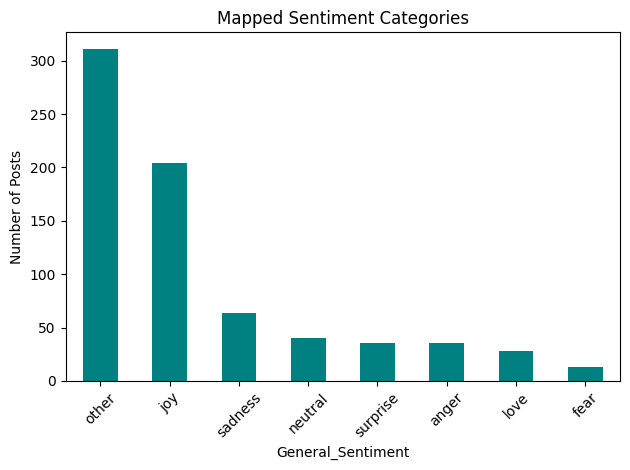

In [ ]:
#Mapping
print(df['General_Sentiment'].value_counts())

import matplotlib.pyplot as plt
df['General_Sentiment'].value_counts().plot(kind='bar', color='teal')
plt.title('Mapped Sentiment Categories')
plt.ylabel('Number of Posts')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
#There is still almost the half of the data labeled as 'Other'
#Lets reassign values since the begining using TextBlob. Reassign 'Other'
!pip install -q TextBlob
from textblob import TextBlob


In [ ]:
#Define a text-to-label function
def infer_sentiment_from_text(text):
  polarity = TextBlob(str(text)).sentiment.polarity
  if polarity > 0.3:
    return 'joy'
  elif polarity < -0.3:
    return 'sadness'
  else:
    return 'neutral'

#Lets apply it to the other values

mask = df['General_Sentiment'] == 'other'

df.loc[mask, 'General_Sentiment'] = df.loc[mask, 'Text'].apply(infer_sentiment_from_text)

#Retrieving new values

print(df['General_Sentiment'].value_counts())

General_Sentiment
joy         277
neutral     252
sadness      90
anger        36
surprise     36
love         28
fear         13
Name: count, dtype: int64


In [ ]:
#Lets know the time of the day wehre more joyful comments are uploaded
joy_df = df[df['General_Sentiment'] == 'joy']
print(f"Number of joy posts: {len(joy_df)}")
joy_df[['Text', 'General_Sentiment']].head()

Number of joy posts: 277


,Text,General_Sentiment
0,Enjoying a beautiful day at the park! ...,joy
2,Just finished an amazing workout! 💪 ...,joy
3,Excited about the upcoming weekend getaway! ...,joy
16,Just adopted a cute furry friend! 🐾 ...,joy
20,Sipping coffee and enjoying a good book. ...,joy


/tmp/ipython-input-16-2757452444.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  joy_df['Hour'] = pd.to_datetime(joy_df['Timestamp']).dt.hour


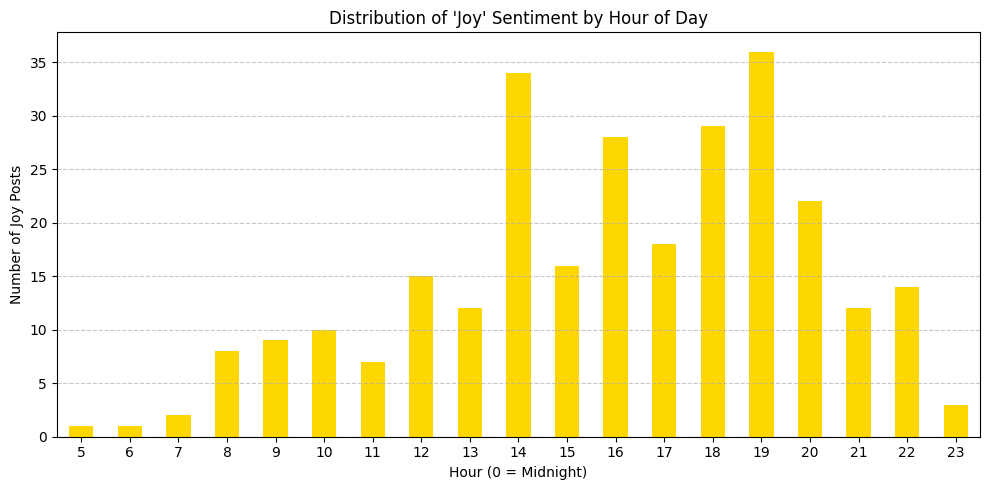

In [ ]:
joy_df['Hour'] = pd.to_datetime(joy_df['Timestamp']).dt.hour
joy_by_hour = joy_df['Hour'].value_counts().sort_index() #Count how many joy posts happen in each hour
plt.figure(figsize=(10, 5))
joy_by_hour.plot(kind='bar', color='gold')
plt.title("Distribution of 'Joy' Sentiment by Hour of Day")
plt.xlabel("Hour (0 = Midnight)")
plt.ylabel("Number of Joy Posts")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


/tmp/ipython-input-17-1270109313.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sadness_df['Hour'] = pd.to_datetime(sadness_df['Timestamp']).dt.hour


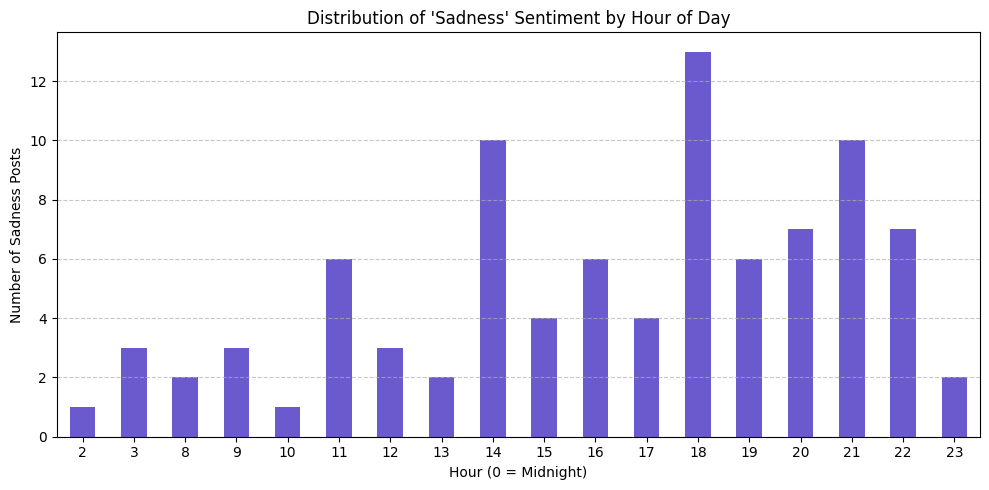

In [ ]:
#Now Sadness hour :(
sadness_df = df[df['General_Sentiment'] == 'sadness']
sadness_df['Hour'] = pd.to_datetime(sadness_df['Timestamp']).dt.hour
sadness_by_hour = sadness_df['Hour'].value_counts().sort_index()
plt.figure(figsize=(10, 5))
sadness_by_hour.plot(kind='bar', color='slateblue')
plt.title("Distribution of 'Sadness' Sentiment by Hour of Day")
plt.xlabel("Hour (0 = Midnight)")
plt.ylabel("Number of Sadness Posts")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
#It appears that 18:00 is the hour with more sad comments, however its close to 19:00 which is the mot with joy comments,
#indicating more that the flow of interactions maybe starts by that time

/tmp/ipython-input-18-1496072036.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sadness_df['Country'] = sadness_df['Country'].astype(str).str.strip().str.upper()


['CANADA' 'INDIA' 'UK' 'USA' 'AUSTRALIA' 'SWITZERLAND' 'FRANCE' 'ITALY'
 'JAPAN' 'SPAIN' 'SOUTH AFRICA' 'GERMANY' 'BRAZIL']
Country
USA             17
CANADA          15
UK              14
INDIA           12
AUSTRALIA       11
FRANCE           4
SPAIN            4
BRAZIL           4
SWITZERLAND      2
SOUTH AFRICA     2
Name: count, dtype: int64


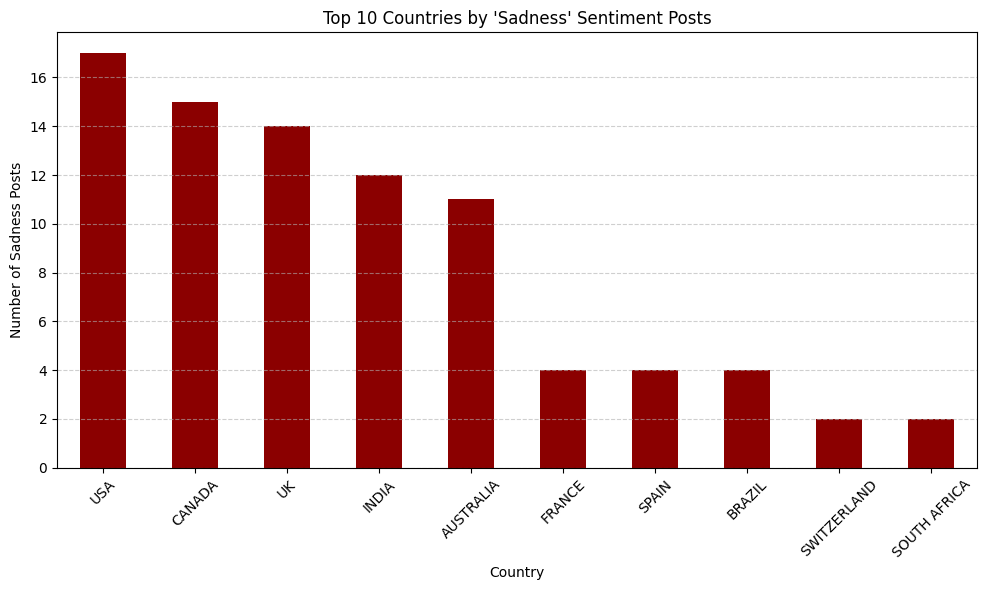

In [ ]:
#Lets now check which is the country with most sad comments
#First we are going to clean the country column as it is not uniform
sadness_df['Country'] = sadness_df['Country'].astype(str).str.strip().str.upper()
print(sadness_df['Country'].unique())
#Count sadness posts per country
sadness_by_country = sadness_df['Country'].value_counts()
print(sadness_by_country.head(10)) #Top 10 countries
plt.figure(figsize=(10, 6))
sadness_by_country.head(10).plot(kind='bar', color='darkred')
plt.title("Top 10 Countries by 'Sadness' Sentiment Posts")
plt.xlabel("Country")
plt.ylabel("Number of Sadness Posts")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [ ]:
#Lets now make a heat map of Sentiment by Country + Platform
#Lets keep cleaning the data, standardizing country and sentiment
df['Country'] = df['Country'].astype(str).str.strip().str.upper()
df['Platform'] = df['Platform'].astype(str).str.strip().str.upper()
df['General_Sentiment'] = df['General_Sentiment'].astype(str).str.strip().str.lower()



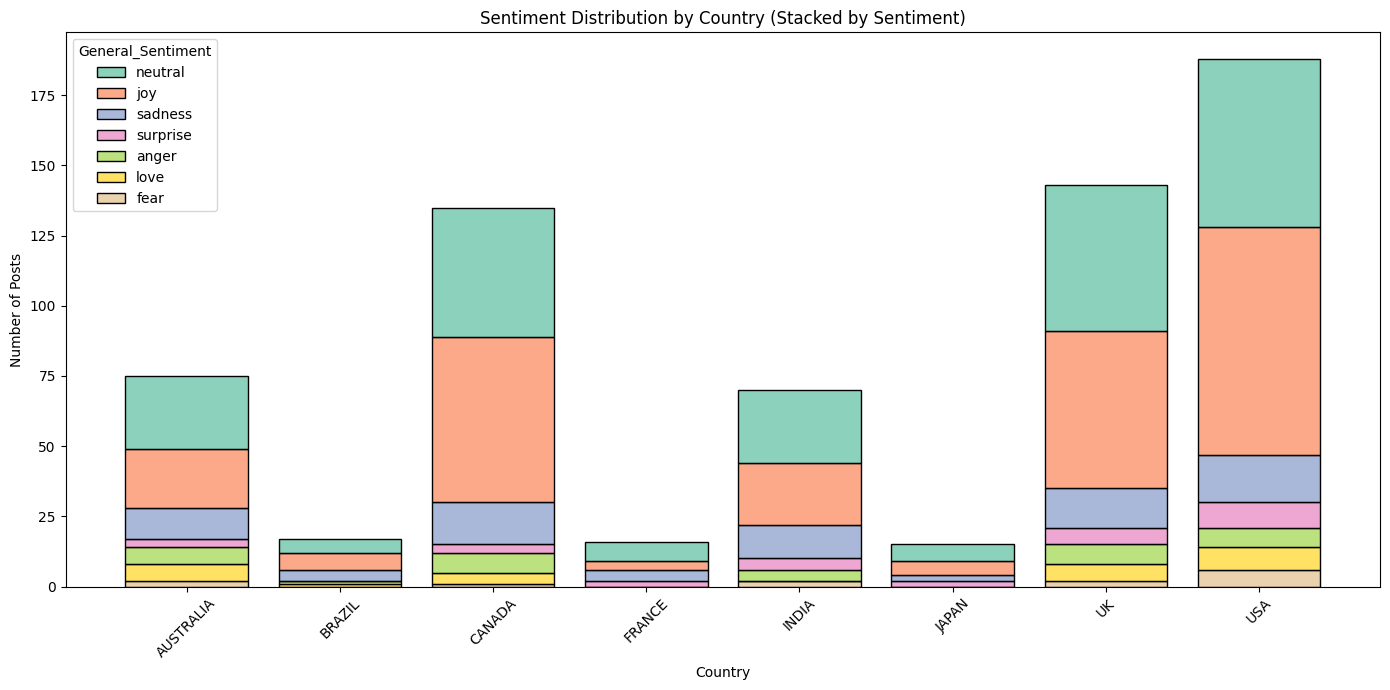

In [ ]:
# Group and pivot by Country, Platform, and Sentiment
pivot = df.groupby(['Country', 'Platform', 'General_Sentiment']).size().reset_index(name='Count')

# Filter to top N countries by post count
top_countries = df['Country'].value_counts().head(8).index
filtered = pivot[pivot['Country'].isin(top_countries)]

# Create stacked barplot using seaborn
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
sns.set_palette('Set2')

sns.histplot(
    data=filtered,
    x='Country',
    weights='Count',
    hue='General_Sentiment',
    multiple='stack',
    hue_order=filtered['General_Sentiment'].value_counts().index,
    shrink=0.8,
    bins=len(top_countries)
)

plt.title("Sentiment Distribution by Country (Stacked by Sentiment)")
plt.xlabel("Country")
plt.ylabel("Number of Posts")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()